IMPORTS

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter

Parameters

In [34]:
N=2
T=400
dt=0.1
s0=1
e01=np.pi
e02=np.pi*0
eps=1e-16
alph=2
ROI=6
Dia=2
gam=1
S=30

Auxillary Functions

In [35]:
def plot_pos(pos: np.ndarray,t):
    plt.scatter(pos[:,0,0],pos[:,1,0])
    plt.grid(True)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f'Agents at t={t}')
    
    

Initial Conditions, t=0

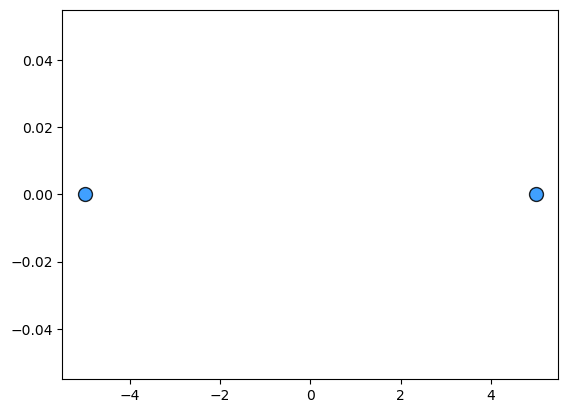

In [36]:
t=0
pos=np.zeros((N,2,T))
vel=np.zeros((N,2,T))
acc=np.zeros((N,2,T))

pos[0,0,t]=5
pos[0,1,t]=0
pos[1,0,t]=-5
pos[1,1,t]=0

vel[0,0,t]=0
vel[0,1,t]=1
vel[1,0,t]=0
vel[1,1,t]=0
# pos[2,0,t]=5
# pos[2,1,t]=2.5
# pos[3,0,t]=-5
# pos[3,1,t]=2.5

# R=10
# theta = np.linspace(0, 2*np.pi, N, endpoint=False)-np.pi/4
# pos[:, 0, t] = R * np.cos(theta)  # x
# pos[:, 1, t] = R * np.sin(theta)  # y

plt.scatter(pos[:,0,0],pos[:,1,0],s=100, c='dodgerblue', edgecolors='k', alpha=0.85)



In [37]:
a=np.array([1,2,3])
a.round(2)

array([1, 2, 3])

In [38]:
for t in range(1,T):
    print("--")
    for i in range(N):
        v0=s0*np.round(np.array([np.cos(e01),np.sin(e01)]),2) if i%2==0 else s0*np.array([np.cos(e02),np.sin(e02)]).round(2)
        print(v0)
        intrinsic_term=-alph*(vel[i,:,t-1]-v0)
        repulsion_term=0
        for j in range(N):
            dist_ij=np.sqrt(eps+(pos[i,0,t-1]-pos[j,0,t-1])**2+(pos[i,1,t-1]-pos[j,1,t-1])**2)
            if dist_ij>ROI:
                continue
            else:
                repulsion_term+= gam*(pos[i,:,t-1]-pos[j,:,t-1])/((dist_ij-Dia)**3) 
            
        acc[i,:,t]=intrinsic_term+repulsion_term if i!=1 else acc[i,:,t-1]
    vel[:,:,t]=vel[:,:,t-1]+(dt*acc[:,:,t])
    pos[:, :, t] = ((pos[:, :, t-1] + dt * vel[:, :, t] + S/2) % S) - S/2

    

--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]
[1. 0.]
--
[-1.  0.]


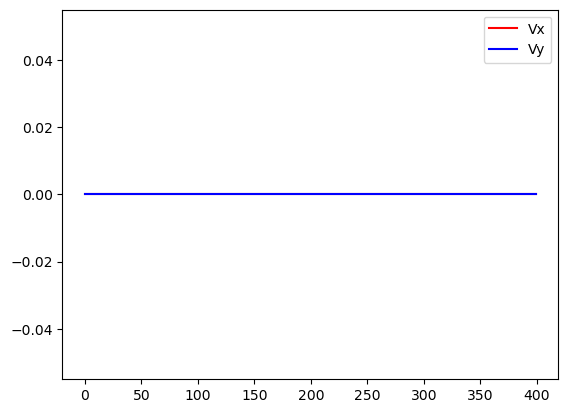

In [39]:
'''Plotting Velocities'''
plt.plot([vel[1,0,t] for t in range(T)],color='r',label='Vx')
plt.plot([vel[1,1,t] for t in range(T)],color='b',label="Vy")
# plt.xlim(380,410)
plt.legend()

In [40]:
fig, ax = plt.subplots(figsize=(6, 6))

scat = ax.scatter([], [], s=100, c='dodgerblue', edgecolors='k', alpha=0.85)
# scat = ax.scatter([], [], s=60*Dia*10, c='dodgerblue', edgecolors='k', alpha=0.85)
title = ax.text(0.5, 1.05, '', transform=ax.transAxes, ha='center', fontsize=14)

def init():
    ax.set_xlim(-S, S)
    ax.set_ylim(-S, S)
    ax.set_xlabel("x", fontsize=12)
    ax.set_ylabel("y", fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_aspect("equal")
    return scat, title

def update(t):
    scat.set_offsets(pos[:, :, t])
    title.set_text(f"Agent Positions at t={t*dt:.1f}s")
    return scat, title

ani = FuncAnimation(fig, update, frames=T, init_func=init, blit=True, interval=50)

# --- Save to video (MP4) ---
writer = FFMpegWriter(fps=20, metadata=dict(artist='Active Inference'))
ani.save("agent_positions.mp4", writer=writer)
plt.close()

print("✅ Video saved as 'agent_positions.mp4'")

✅ Video saved as 'agent_positions.mp4'


### Moving Towards Active Inference

### Defining States and Actions

Current agent's state would be the measure of contributions of F $(F^{res})$ restitution and F repulsion $(F^{res})$. 

$d=\frac{|F^{res}|}{|F^{rep}|}$.

We currently consider just the mag, directions we can extend later.

Aggent desires two things in a preference order:
- Agent Desires d to be minimum,
- At the minimum, v0 must be it's intrinsic one, say $eta$

actions: changes preferred direction $\hat{e}0$
- DEFAULT: Changes $\hat{e}0$ to the default value, say $\eta$
- SLIGHT R : Change $\hat{e}0$ slightly
- MAJOR : Change $\hat{e}0$ significantly
<!-- - EXTREME: Turn Back -->